### This ipnyb file contains all studies about _linear regression_, the formulas used and 2 implementions

- Implementation on synthetic data
- Implementation on a data set

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [54]:
class linear_reg:
    def __init__(self):
        self.slope = 0
        self.c = 0

    def train(self, X, Y):
        x_average = np.average(X)
        y_average = np.average(Y)
        
        numerator = 0
        denominator = 0
        
        for x, y in zip(X, Y):
            numerator += (x - x_average) * (y - y_average)
            denominator += (x - x_average) ** 2
        
        if denominator == 0:
            raise ValueError("Division by zero error: All x values are the same.")
        
        self.slope = numerator / denominator
        self.c = y_average - self.slope * x_average
        
        print(f"The predicted function is: y = {self.slope}x + {self.c}")

    def test(self, X, Y):
        error = 0
        for x, y in zip(X, Y):
            error += (self.slope * x + self.c - y) ** 2
        print(f"The error found is {error}")

    """def plot(self, X, Y):
        
        plt.scatter(X, Y, color='blue', label='Data Points')
        
        
        regression_line = [self.slope * x + self.c for x in X]
        plt.plot(X, regression_line, color='red', label='Regression Line')
        
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()
    """
    def predict_and_update(self, x, X, Y):
        
            y_pred = self.slope * x + self.c
            print(f"For the given input {x}, the predicted output is: {y_pred}")
            
            
            X = np.append(X, [x])
            Y = np.append(Y, [y_pred])
            
            
            self.train(X, Y)
            
            
            self.test(X, Y)
            
            
            return X, Y
    def plot(self, X_train,Y_train, X_test, Y_test):
        plt.figure(figsize=(10,6))

        plt.scatter(X_train, Y_train, color = 'blue', label='train data')

        if( X_test is not None and Y_test is not None):
            plt.scatter(X_test, Y_test, color = 'green', label = 'test data')

        x_values = np.linspace(min(X_train), max(X_train), 100)
        y_values = self.slope * x_values + self.c
        plt.plot(x_values, y_values, color = 'red', label =  'Regression line')
        plt.show()

The predicted function is: y = 2.0x + 1.0
The error found is 0.0


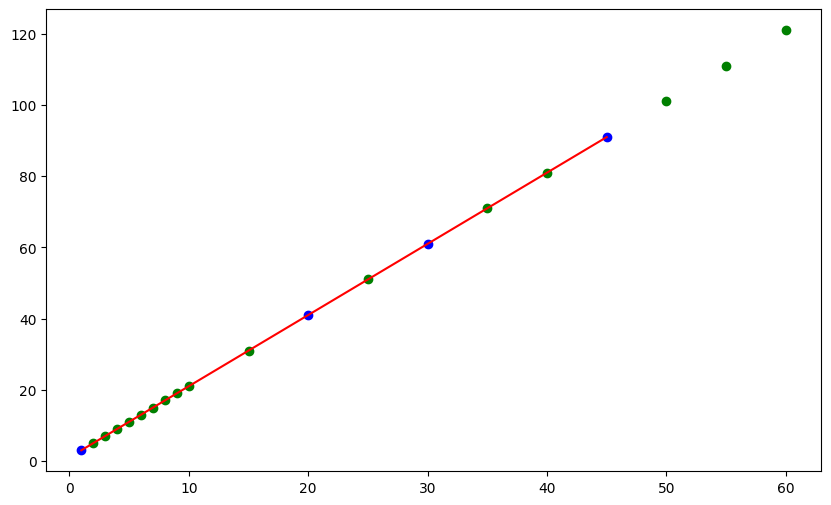

In [55]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
Y = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121])

# Create an instance of the linear_reg class
linear = linear_reg()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=50)


# Train the model
linear.train(X_train, Y_train)

# Test the model
linear.test(X_test, Y_test)

linear.plot(X_train, Y_train, X_test, Y_test)



### Using diabetes dataset for regression

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
<built-in method keys of Bunch object at 0x000002C48F2E3160>
The predicted function is: y = 939.8605302881755x + 153.53859366402583
The error found is 302633.77586578805


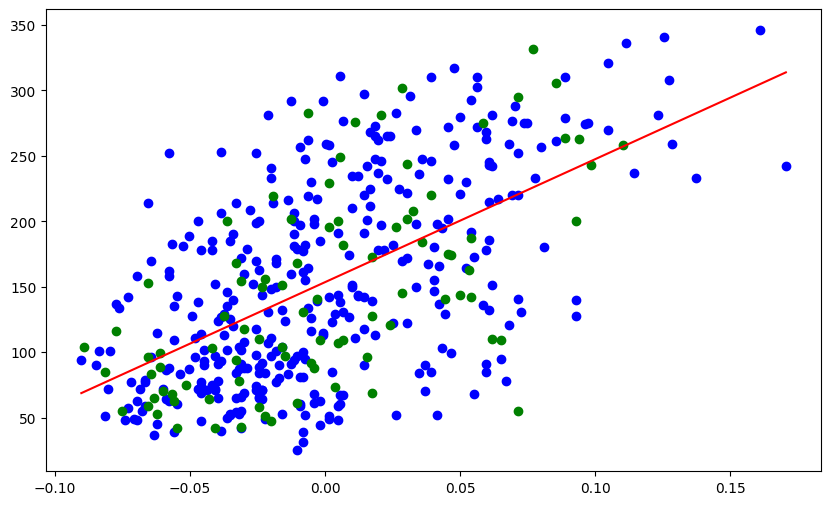

In [56]:
diabetes = load_diabetes()

print(diabetes.feature_names)
print(diabetes.keys)

"""I will select only BMI {thrid column} for simplicity """
X = diabetes.data[:,2] 
Y = diabetes.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=50)

model = linear_reg()
model.train(X_train, Y_train)

model.test(X_test, Y_test)

model.plot(X_train, Y_train, X_test, Y_test)

### All the math used

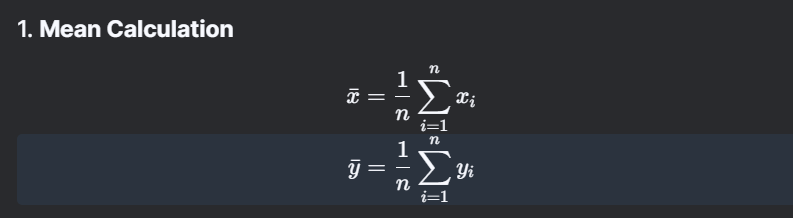
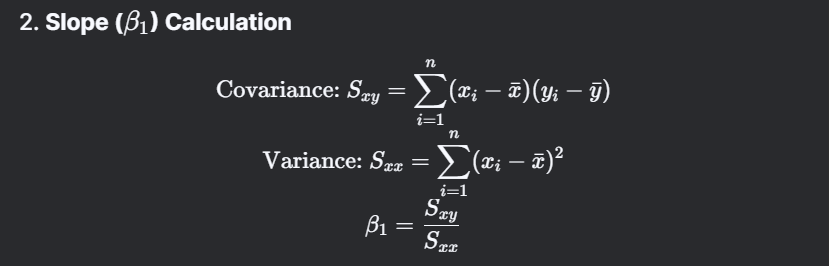
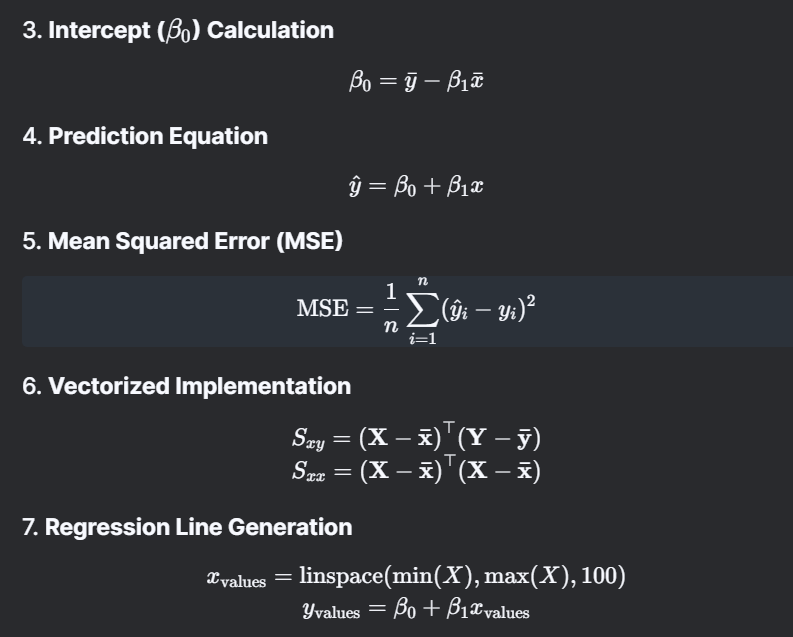

